##Practica 6.

# **Estadistica descriptiva Dataset AutosTarea**
Profesor: José Gabriel Rodríguez Rivas


Alumna: Karol Ximena Rivera Piñon

In [ ]:
from statistics import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

In [ ]:
auto=pd.read_csv("/content/autos2.csv")
print(auto)


     symboling  normalized-losses         make fuel-type aspiration  \
0            3              122.0  alfa-romero       gas        std   
1            3              122.0  alfa-romero       gas        std   
2            1              122.0  alfa-romero       gas        std   
3            2              164.0         audi       gas        std   
4            2              164.0         audi       gas        std   
..         ...                ...          ...       ...        ...   
200         -1               95.0        volvo       gas        std   
201         -1               95.0        volvo       gas      turbo   
202         -1               95.0        volvo       gas        std   
203         -1               95.0        volvo    diesel      turbo   
204         -1               95.0        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88

In [ ]:
#Estadisticas descriptivas básicas y medidas de tendencia central
prem=auto.price.min()
print("el precio mas bajo",prem)
preM=auto.price.max()
print("el precio mas alto",preM)
media=auto.price.mean()
print("la media de los precios",media)
mediana=auto.price.median()
print("la mediana de precios",mediana)
desv=auto.price.std()
print("desviacion estandar de los precios",desv)
moda=auto.price.mode()
print("la moda de precios\n",moda)

auto.describe()


el precio mas bajo 5118.0
el precio mas alto 45400.0
la media de los precios 13207.129353233831
la mediana de precios 10295.0
desviacion estandar de los precios 7947.066341939274
la moda de precios
 0      5572.0
1      6229.0
2      6692.0
3      7295.0
4      7609.0
5      7775.0
6      7898.0
7      7957.0
8      8495.0
9      8845.0
10     8921.0
11     9279.0
12    13499.0
13    16500.0
14    18150.0
Name: price, dtype: float64


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,31.681008,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
#Determinar mediante la regla de sturges la cantidad optima de bins o separadores
n=len(auto.price)
k=int(1+math.log2(n))
stur=pd.cut(auto.price,bins=k).value_counts().reset_index()
stur.columns=("precios","autos")
stur

,precios,autos
0,"(5077.718, 10153.25]",98
1,"(10153.25, 15188.5]",42
2,"(15188.5, 20223.75]",36
3,"(20223.75, 25259.0]",8
4,"(30294.25, 35329.5]",7
5,"(35329.5, 40364.75]",4
6,"(25259.0, 30294.25]",3
7,"(40364.75, 45400.0]",3


Text(0, 0.5, 'autos')

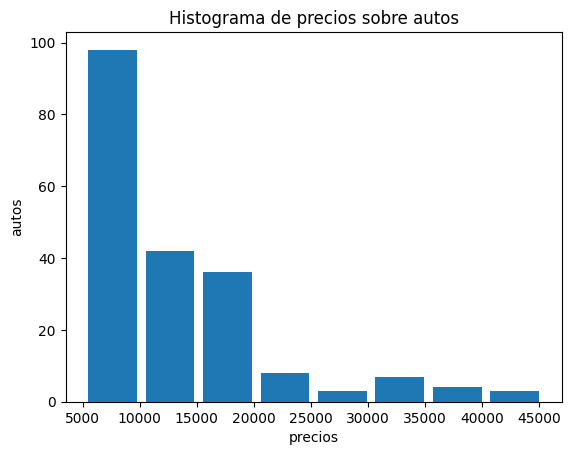

In [ ]:
#Realizar un Histograma de precios de los automoviles
plt.hist(auto.price, bins=k,rwidth=0.85)
plt.title("Histograma de precios sobre autos")
plt.xlabel("precios")
plt.ylabel("autos")

Mediante el grafico anterior podemos ver que hay una cantidad de autos mayor que ronda en los precios de 5000 a 10000 pesos con 98 autos, y mientras aumenta el precio la cantidad de autos baja, entonces la cantidad mas baja los autos con precio de entre 25000-30000 y 40000 a 45000, con solo solo 3 unidades en cada una.


Text(0.5, 1.0, 'comparacion de precios y estilos de los autos')

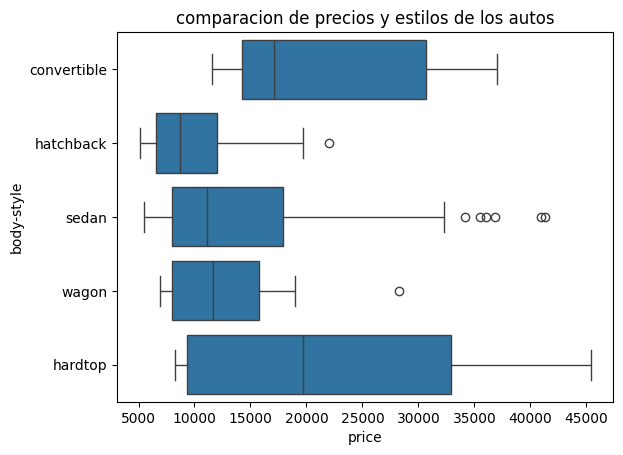

In [ ]:
#Realizar un diagrama de caja y bigotes que muestre la arelacion estadistica entre la columna del precio del automovil (price) y tipo de vehiculo (body style)
sns.boxplot(x=auto["price"], y=auto["body-style"],data=auto)
plt.title("comparacion de precios y estilos de los autos")

Mirando el gráfico, es bastante interesante ya que nos da una idea rápida de cómo los precios de los autos están vinculados a sus estilos de carrocería. Y nos damos cuenta de cómo hay un montón de estilos diferentes,  lo más interesante es que los precios no son iguales para todos. Esta info nos ayuda a entender mejor qué está pasando en el mercado de los autos y nos ayuda a tomar decisiones más acertadas.

Text(0.5, 1.0, 'comparacion de precios y ruedas de los autos')

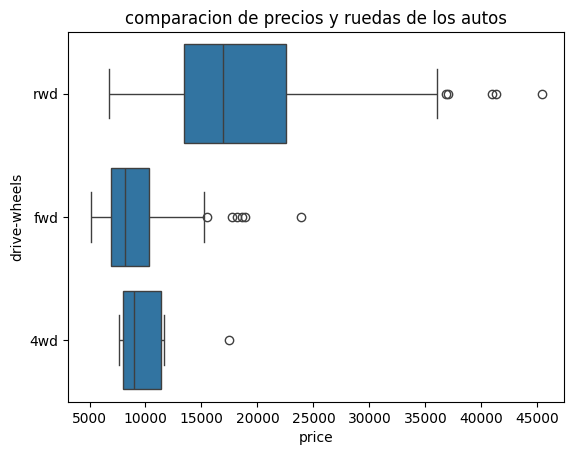

In [ ]:
#Realizar un diagrama de caja y bigotes que muestre la arelacion estadistica entre la columna del precio del automovil (price) y tipo traccion ruedas (drive wheels)
sns.boxplot(x=auto["price"], y=auto["drive-wheels"],data=auto)
plt.title("comparacion de precios y ruedas de los autos")


Deacuerdo a el gráfico, Nos muestra cómo varían los precios de los autos según el tipo de tracción que tienen. Mirandolo bien, los que tienen tracción en las cuatro ruedas (4WD) suelen tener precios más altos que los que solo tienen tracción delantera (FWD) o trasera (RWD). Parece que el tipo de tracción juega un papel importante en lo que terminas pagando por un auto.

Text(0.5, 1.0, 'comparacion de precios y la locacion del motor de los autos')

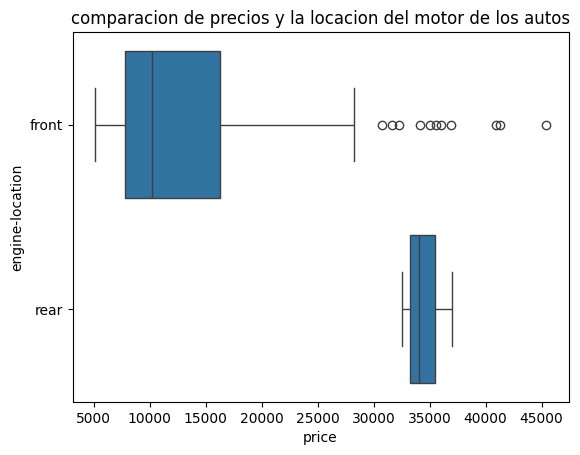

In [ ]:
#Realizar un diagrama de caja y bigotes que muestre la arelacion estadistica entre la columna del precio del automovil (price) y la ubicacion del motor (engine-location)
sns.boxplot(x=auto["price"], y=auto["engine-location"],data=auto)
plt.title("comparacion de precios y la locacion del motor de los autos")

Echando un vistazo al gráfico, Muestra cómo se relacionan los precios de los autos con dónde está colocado el motor. Los autos con el motor en la parte trasera suelen tener precios más elevados que los que tienen el motor en la parte delantera. Parece que dónde está ese motor es clave para lo que terminas pagando por un auto. Tal vez tenga que ver con cómo funcionan, cómo lucen o simplemente por ser más exclusivos.

##conclusion general

Así que, echando un vistazo al archivo de datos que importamos, nos encontramos con una larga lista que detalla las características de varios autos. Lo interesante es que al estudiar esos datos, nos damos cuenta de que cosas como el diseño de la carrocería, si es tracción trasera o delantera, y hasta dónde está ubicado el motor, todo eso influye en lo que terminamos pagando por un vehículo. Es como si cada detalle jugara un papel importante en la etiqueta de precio de un carro.

Esto nos hace pensar que cuando la gente va a comprar un auto, tienen en mente todas esas cosas: ¿quieren algo que se vea genial y deportivo, o algo más práctico y familiar? Además, hay algunos tipos de autos que tienen esa 'fama',  Como esos carros que, solo por el nombre, ya sabes que son de alta gama.

Y luego, cuando nos metemos en las estadísticas y números, las cosas se ponen aún más interesantes. Porque resulta que hay una relación bastante clara entre la probabilidad y las estadísticas en el mercado automotriz. Con esas herramientas de números, podemos hacer todo tipo de operaciones para entender mejor qué es lo que la gente busca cuando tiene que decidir entre un montón de opciones de autos.

Es como si estuviéramos leyendo las mentes de los compradores, pero en realidad, solo estamos analizando datos.